# Stationarity in Time Series

**Author:** Michael Childress  
**Date:** 2025‑04‑18  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess

# Utility for consistent plots
def run_sequence_plot(x, y, title, xlabel="Time", ylabel="Value"):
    fig, ax = plt.subplots(figsize=(10, 3.5))
    ax.plot(x, y, 'k-')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(alpha=0.3)
    return ax

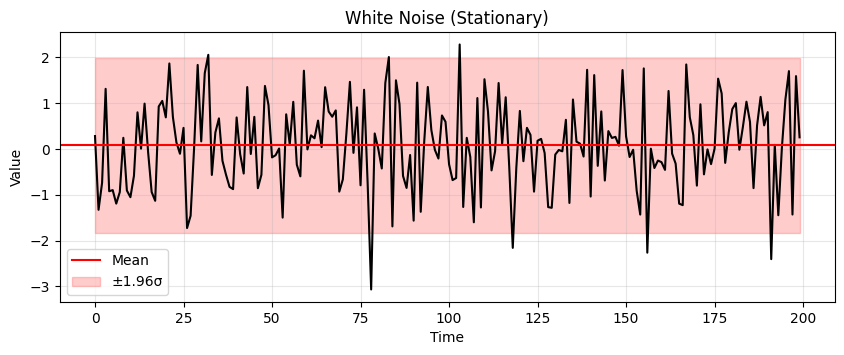

In [2]:
T = 200
time = np.arange(T)
white = np.random.normal(loc=0, scale=1.0, size=T)
ax = run_sequence_plot(time, white, "White Noise (Stationary)")
ax.axhline(white.mean(), color='red', label='Mean')
ax.fill_between(time,
                white.mean() - 1.96*white.std(),
                white.mean() + 1.96*white.std(),
                color='red', alpha=0.2, label='±1.96σ')
ax.legend()
plt.show()

**Discussion: White Noise**  
- Fluctuations hover around a fixed mean (≈ 0) and stay within constant variance bands.  
- No visible trend, no repeating patterns, and successive points show no dependence → ideal stationary behavior.  
- All three weak‑stationarity conditions (constant mean, constant variance, constant autocovariance) are met.

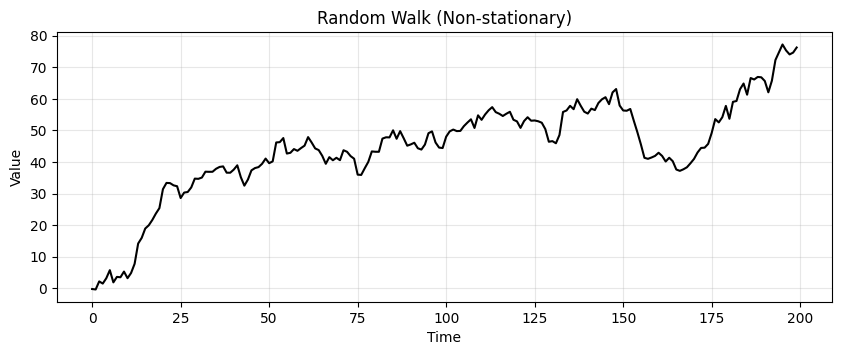

In [3]:
# build random walk
rand = np.empty(T)
seed = 0
for t in range(T):
    rand[t] = seed + np.random.normal(0, 2.5)
    seed = rand[t]
run_sequence_plot(time, rand, "Random Walk (Non‑stationary)")
plt.show()

**Discussion: Random Walk**  
- The series meanders away from its starting value with no pull‑back → mean drifts over time.  
- Variance grows larger as time progresses (wider swings later on) → violates constant‑variance requirement.  
- Strong persistence: every new point depends heavily on the last one, creating long trends.

**Linear Trend**

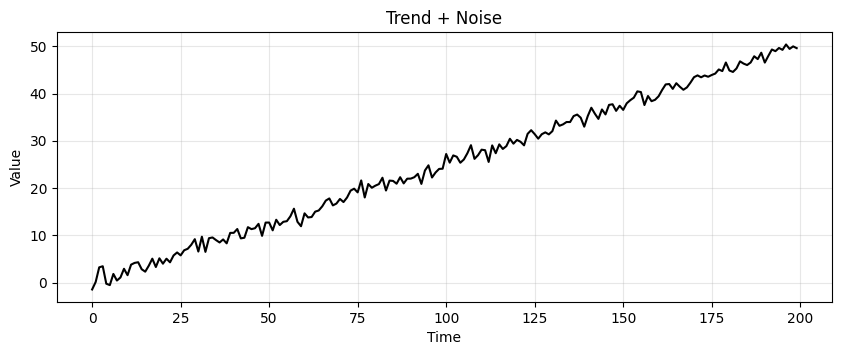

In [4]:
trend = np.linspace(0, 50, T) + np.random.normal(0,1,T)
run_sequence_plot(time, trend, "Trend + Noise")
plt.show()

**Discussion: Trend + Noise**  
- Despite random jitter, there’s a clear upward slope → mean is not constant.  
- Even if variance is roughly stable, the drifting level breaks stationarity.  

**Heteroscedastic Series***

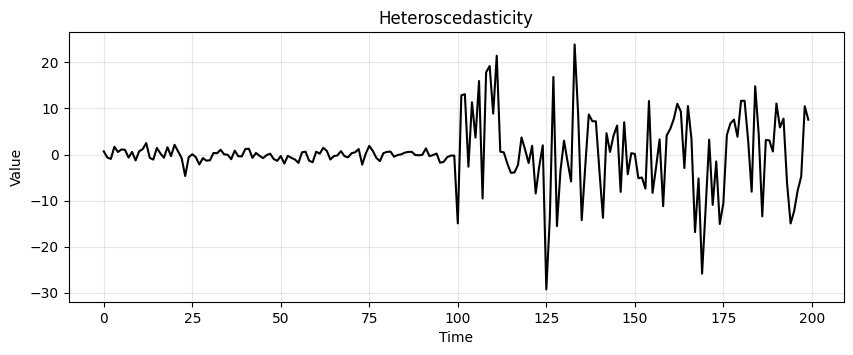

In [5]:
level1 = np.random.normal(0,1,100)
level2 = np.random.normal(0,10,100)
het = np.concatenate([level1, level2])
run_sequence_plot(time, het, "Heteroscedasticity")
plt.show()

**Discussion: Heteroscedastic Series**  
- First half is low‑volatility, second half is high‑volatility → variance changes over time.  
- Mean may stay around zero, but changing spread alone breaks weak stationarity.  


**Pure Seasonality**

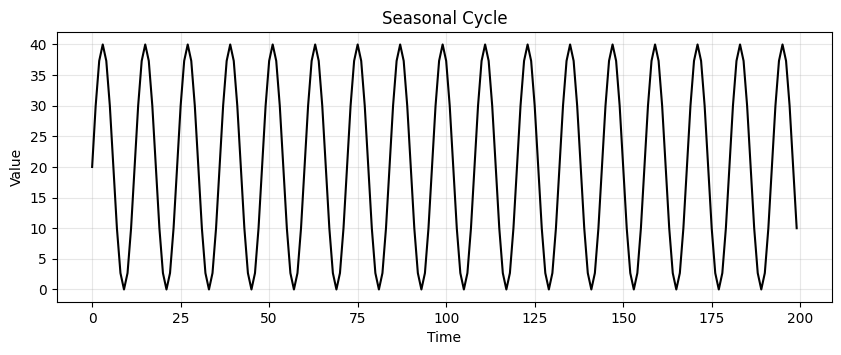

In [6]:
season = 20 + 20*np.sin(2*np.pi*time/12)
run_sequence_plot(time, season, "Seasonal Cycle")
plt.show()

**Discussion: Pure Seasonality**  
- The series oscillates with a fixed amplitude and period but the within‑cycle mean shifts (peaks vs troughs).  
- Over any sub‑cycle, the average value moves away from the long‑run center → violates constant‑mean.  


**Trend + Seasonality**

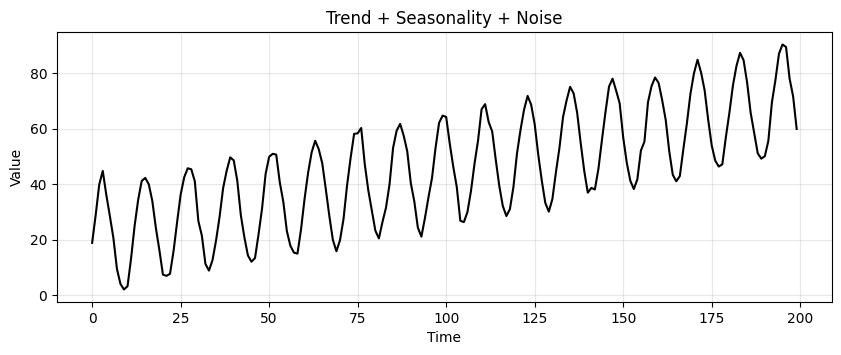

In [7]:
ts = trend + season + white
run_sequence_plot(time, ts, "Trend + Seasonality + Noise")
plt.show()

**Discussion: Combined Trend & Seasonality**  
- Upward drift plus repeating peaks/troughs → both mean and periodic structure change over time.  
- Two‑step transformation needed: first remove seasonality, then difference or detrend to remove the remaining drift.

**Detecting Stationarity**

In [8]:
def stationarity_tests(x):
    adf_stat, adf_p, *_ = adfuller(x)
    kpss_stat, kpss_p, *_ = kpss(x, regression='c', nlags='auto')
    print(f"ADF p‑value: {adf_p:.4f}")
    print(f"KPSS p‑value: {kpss_p:.4f}")

print("White noise tests:")
stationarity_tests(white)

print("\nRandom walk tests:")
stationarity_tests(rand)

White noise tests:
ADF p‑value: 0.0000
KPSS p‑value: 0.1000

Random walk tests:
ADF p‑value: 0.2302
KPSS p‑value: 0.0100


/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_87838/368991436.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(x, regression='c', nlags='auto')
/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_87838/368991436.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(x, regression='c', nlags='auto')


**Discussion: Stationarity Tests**  
- **White noise:** ADF p < 0.05 (reject non‑stationary), KPSS p > 0.05 (fail to reject stationary) → confirms stationarity.  
- **Random walk:** ADF p > 0.05, KPSS p < 0.05 → confirms non‑stationarity.

**Transformations to Achieve Stionarity**

First Differencing

ADF p‑value: 0.0000
KPSS p‑value: 0.1000


/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_87838/368991436.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(x, regression='c', nlags='auto')


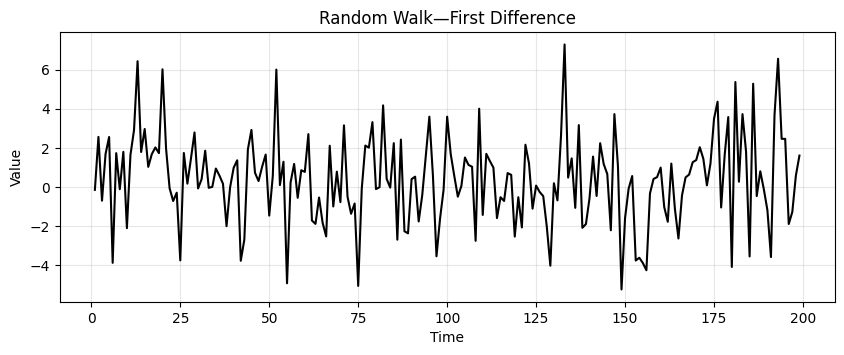

In [9]:
diff_rand = np.diff(rand)
run_sequence_plot(time[1:], diff_rand, "Random Walk—First Difference")
stationarity_tests(diff_rand)
plt.show()

**Discussion: First Difference of Random Walk**  
- After differencing, the mean centers around zero and variance no longer explodes.  
- Dependence on only the prior step remains, but no long‑term drift.  
- Series now approximates white‑noise‑like behavior → stationarity tests should pass.

Log Transform

ADF p‑value: 0.0000
KPSS p‑value: 0.1000


/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_87838/368991436.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(x, regression='c', nlags='auto')


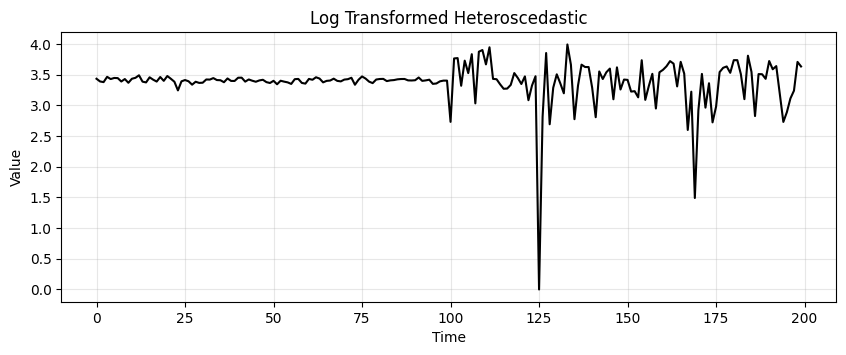

In [10]:
het_pos = het - het.min() + 1
log_het = np.log(het_pos)
run_sequence_plot(time, log_het, "Log Transformed Heteroscedastic")
stationarity_tests(log_het)
plt.show()

**Discussion: Log‑Transformed Heteroscedastic Series**  
- Applying log squashes the high‑variance segment, bringing its spread closer to the low‑variance segment.  
- Variance is now more uniform across the entire series.  
- Mean remains stable; this transform often suffices to restore stationarity when heteroscedasticity is the only issue.

Seasonal Differencing

ADF p‑value: 0.0001
KPSS p‑value: 0.1000


/var/folders/yj/3s0hc5nn3qlg4lqp7wmfgq_c0000gn/T/ipykernel_87838/368991436.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(x, regression='c', nlags='auto')


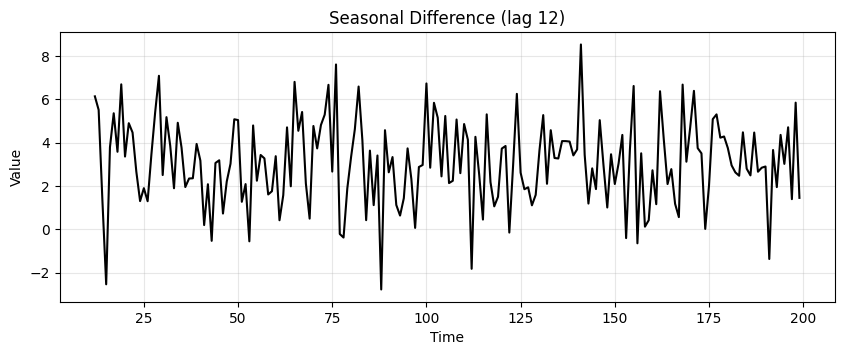

In [11]:
seas_diff = ts[12:] - ts[:-12]
run_sequence_plot(time[12:], seas_diff, "Seasonal Difference (lag 12)")
stationarity_tests(seas_diff)
plt.show()

**Discussion: Seasonal Differencing (lag 12)**  
- Subtracting each point from its value 12 steps ago effectively removes the repeating cycle.  
- The resulting series fluctuates around a constant level with no obvious periodic swings.  
- After this step (and perhaps a subsequent first difference), the series meets stationarity requirements.